In [1]:
import mne
from mne import io
from mne.event import define_target_events
import numpy as np
import h5py

In [3]:
mne.io.read_raw_artemis123('D:/001/Patient_id_01_Day1_10.09.2018/RecordSession_ Post_EB2018.09.10_13.24.47.hdf5')

RuntimeError: Valid artemis123 files must end in "txt" or ".bin".

In [2]:
eeg= mne.externals.h5io.read_hdf5('D:/001/Patient_id_03_Day30_17.10.2018/b2018.10.17_11.40.48.hdf5', title='h5')

ValueError: no "h5" data found

In [31]:
eeg= h5py.File('D:/001/Patient_id_01_Day90_10.12.2018/a_2018.12.10_11.02.43.hdf5', mode='r')

In [13]:
for title in eeg:
    print (title)

AsynchronData
RawData
SavedFeatues
Version


In [40]:
samples= np.array(eeg['RawData']['Samples'])
samples= samples.T
print (len(samples))

64


In [16]:
print (eeg['Version'])

<HDF5 group "/Version" (1 members)>


In [15]:
montage= mne.channels.read_montage('64electrodes', ch_names=None, path="D:/001/1", unit='auto', transform=False)

In [22]:
ch_n=['Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3','AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6',
         'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 
         'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5',
         'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'TP9',
         'TP10', 'A1', 'A2']

In [23]:
print (len(ch_n))

64


In [25]:
info= mne.create_info(ch_names= ch_n, sfreq= 256, ch_types='eeg', montage=montage, verbose=None)

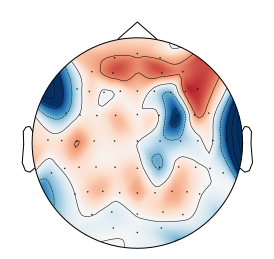

(<matplotlib.image.AxesImage at 0x1dec246d6d8>,
 <matplotlib.contour.QuadContourSet at 0x1dec246d278>)

In [37]:
mne.viz.plot_topomap(samples, pos= info)

In [41]:
raw= mne.io.RawArray(data= samples, info= info)

Creating RawArray with float64 data, n_channels=64, n_times=40665
    Range : 0 ... 40664 =      0.000 ...   158.844 secs
Ready.


In [42]:
raw.filter(1., None, n_jobs=1, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 sec)



<RawArray  |  None, n_channels x n_times : 64 x 40665 (158.8 sec), ~20.0 MB, data loaded>

In [43]:
method = 'fastica'

# Choose other parameters
n_components = 64  # if float, select n_components by explained variance of PCA
decim = 3  # we need sufficient statistics, not all time points -> saves time

# we will also set state of the random number generator - ICA is a
# non-deterministic algorithm, but we want to have the same decomposition
# and the same order of components each time this tutorial is run
random_state = 23

In [46]:
ica = mne.preprocessing.ICA(n_components=n_components, method=method, random_state=random_state)
print(ica)

<ICA  |  no decomposition, fit (fastica):  samples, no dimension reduction>


In [47]:
reject = dict(mag=5e-12, grad=4000e-13)
ica.fit(raw, picks='eeg', decim=decim, reject=reject)
print(ica)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 64 components
Fitting ICA took 4.7s.
<ICA  |  raw data decomposition, fit (fastica): 13509 samples, 64 components, channels used: "eeg">


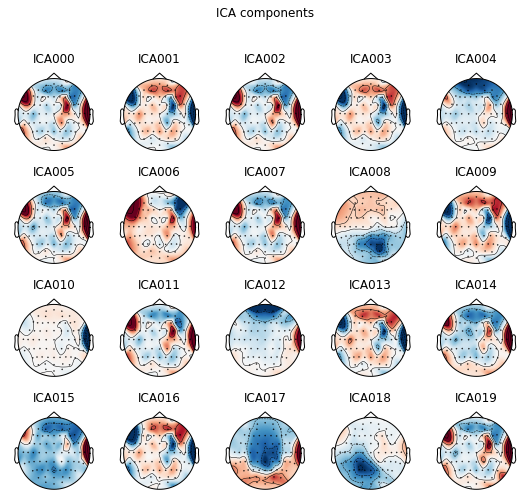

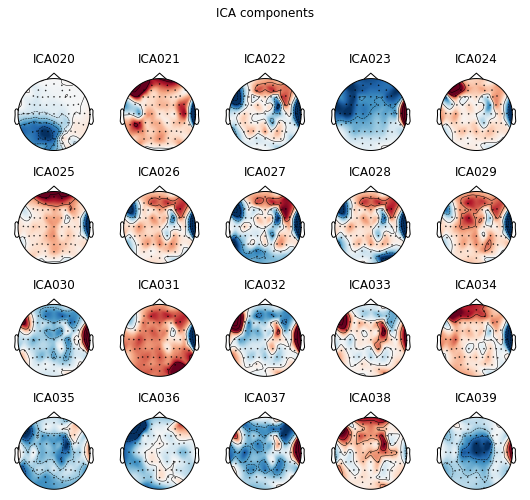

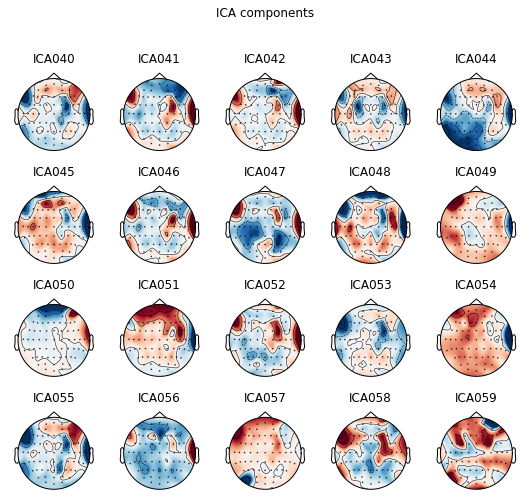

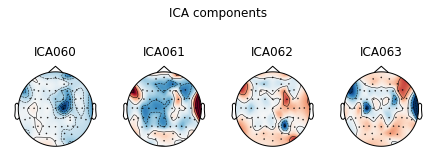

[<Figure size 540x504 with 20 Axes>,
 <Figure size 540x504 with 20 Axes>,
 <Figure size 540x504 with 20 Axes>,
 <Figure size 446.4x180 with 4 Axes>]

In [48]:
ica.plot_components()

Creating RawArray with float64 data, n_channels=64, n_times=40448
    Range : 0 ... 40447 =      0.000 ...   157.996 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


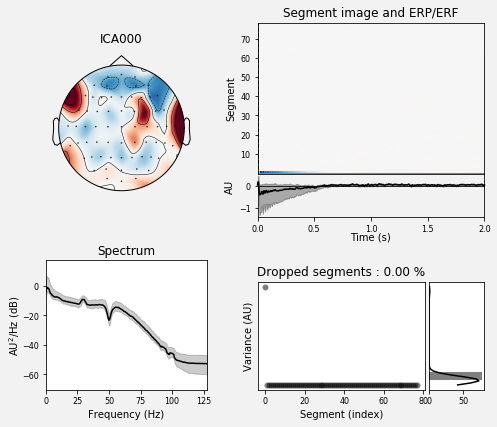

[<Figure size 504x432 with 6 Axes>]

In [49]:
ica.plot_properties(raw, picks=0)

Creating RawArray with float64 data, n_channels=64, n_times=40448
    Range : 0 ... 40447 =      0.000 ...   157.996 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


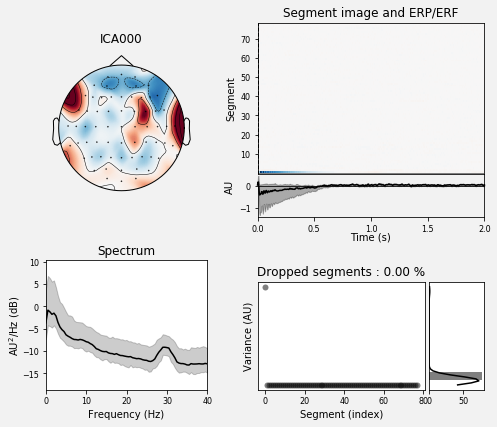

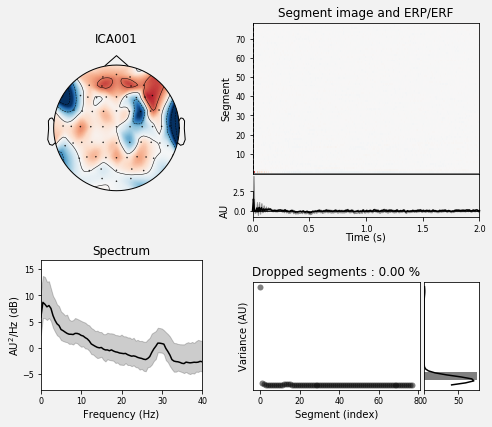

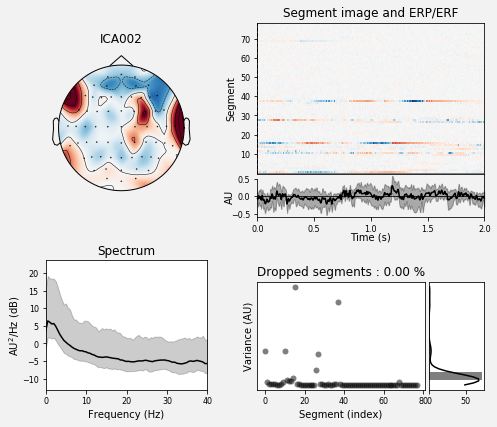

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [52]:
ica.plot_properties(raw, picks=[0, 1, 2], psd_args={'fmax': 40.})